<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Selena Elizabeth Rivas Mera <br>
Fecha: 18/07/2022

# Importación de librerias necesarias

In [42]:
#Para esta actividad se importarán las siguientes librerías:
#Importamos la libreria pandas
import pandas as pd
#Importamos la libreria numpy
import numpy as np
#Importar la libreria StandardScaler
from sklearn.preprocessing import StandardScaler
#Importamos train_test_split de la ibreria sklearn.model_selection
from sklearn.model_selection import train_test_split
#Importamos LinearRegression de la libreria sklearn.linear_model
from sklearn.linear_model import LinearRegression
#Importar de metodos para calculo de error cuadratico y varianza
from sklearn.metrics import mean_squared_error, r2_score

## Cargar el Dataset

In [18]:
#Código para cargar el Dataset
#url dataset
url='https://raw.githubusercontent.com/Selena26/-NRC_6278-_SelenaRivas_Lab1/master/Real-estate.csv'
#cargar datos en base a la url del dataset
Real_estate_data=pd.read_csv(url)

In [19]:
#visualización de los 10 primeros datos
Real_estate_data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


## Descripción de la fuente del Dataset

**Variable Dependiente Y**<br>
**House price of unit area:**Continuo. Precio de la vivienda por unidad de superficie local<br>
**Variables Independientes X**<br>
**Transaction date:** Fecha de transacción<br>
**House age:** La edad de la casa en años<br>
**Fistance to neares MRT station:** la distancia a la estación de metro más cercana en metros.<br>
**Number of convenience stores:** el número de tiendas de conveniencia a las que se puede acceder a pie.<br>
**Latitude:** coordenadas de latitud.<br>
**Longitude:** coordenadas de longitud.<br>

## Explique el problema a resolver. 
Con el presente trabajo se buscar realizar la predicción del precio de las casas en base a las caracteristicas como la fecha de transaccion, la edad de la casa, la distancia a la estacion del metro entre otras. Como se menciono el precio se dara en base a las caracteristicas es decir que el precio de la vivienda sera la variable objetivo o dependiente, mientras que las otras caracteriticas sera las variables independientes.Par realizar este tipo de prediccion se utilizara un modelo de regresión lineal.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [20]:
#Código que responde a la descripción anterior
#Imprimir mensaje
print("Número de instancias en total:")
#Contar las instancias del dataset
Real_estate_data.count()

Número de instancias en total:


No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

In [21]:
#Número de atributos de entrada, su significado y tipo
#Imprimir mensaje
print("Número de atributos de entrada, su significado y tipo:")
#Muestra informacion de los datos de entrada
Real_estate_data.drop('Y house price of unit area', axis=1).info()

Número de atributos de entrada, su significado y tipo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


In [22]:
#Estadísticas de la variable objetivo.
#Imprimir mensaje
print("Estadísticas de la variable objetivo:")
#Preparación para la estaditica de variable objetivo
price = Real_estate_data['Y house price of unit area']
#Presentacion de la variable objetivo
price.describe()

Estadísticas de la variable objetivo:


count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

<AxesSubplot:>

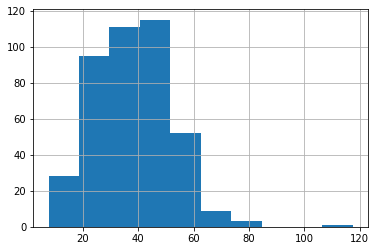

In [23]:
#Crea gráfico de barras como la variable objetivo continua.
Real_estate_data['Y house price of unit area'].hist()

In [24]:
#Estadísticas los atributos en relación con la variable objetivo.
print("Estadísticas los atributos en relación con la variable objetivo:")
#lista de la variable independiente
Variables_Entrada= Real_estate_data[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
#mostrar la información
Variables_Entrada.describe()

Estadísticas los atributos en relación con la variable objetivo:


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361
std,11.392485,1262.109595,2.945562,0.012410,0.015347
min,0.000000,23.382840,0.000000,24.932070,121.473530
25%,9.025000,289.324800,1.000000,24.963000,121.528085
50%,16.100000,492.231300,4.000000,24.971100,121.538630
75%,28.150000,1454.279000,6.000000,24.977455,121.543305
max,43.800000,6488.021000,10.000000,25.014590,121.566270


En el primer punto se presenta un conteo de todas las instancias que hay en el dataset tanto de la variable objetivo como de la variable independientes, es un conteo general de todas las instancias del dataset. En el segundo punto se limita mas ya que unicamente se presenta las variables de entrada su significado y su tipo, en la tercera parte se presenta unicamente las estadisticas de la variable objetivo y un histograma donde se observa una curva de campana entre 0 y 85 y finalmente se presentan las estadísticas los atributos en relación con la variable objetivo.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [25]:
#Transformación de las caracteristicas
# Define la variable objetivo 
Variable_Objetivo=['Y house price of unit area']
# Define las variables de entrada
Variables_Entrada=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

In [26]:
# Asignamos a X las variables de entrada
X=Real_estate_data[Variables_Entrada].values
# Asignamos a y la variable objetivo
y=Real_estate_data[Variable_Objetivo].values

In [27]:
### Estandarización de la data ###
# Definimos las variables de entradas escalar
VariablesEntradaScaler=StandardScaler()
# Definimos la variable objetivo escalar
VariableObjetivoScaler=StandardScaler()

In [28]:
#Alimentamos al modelo con la variable de entrada X
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
#Alimentamos al modelo con la variable objetivo y
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [29]:
#Generación de los valores estandarizados de X
X=VariablesEntradaFit.transform(X)
#Generación de los valores estandarizados de y
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [31]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
#Divida los datos en un conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento de X 
print(X_train.shape)
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento de y
print(y_train.shape)
#Comprobación rápida del tamaño de los conjuntos de datos de prueba de X
print(X_test.shape)
#Comprobación rápida del tamaño de los conjuntos de datos de prueba de y
print(y_test.shape)

(289, 6)
(289, 1)
(125, 6)
(125, 1)


## Regresión Lineal

In [34]:
#Códo del modelo
# Asignamos a una variable el metodo de regresión lineal
Regresion_modelo= LinearRegression()

In [39]:
#Entrenamiento
Regresion_modelo.fit(X_train, y_train)
# Coficientes
print('Coeficientes: \n', Regresion_modelo.coef_)

Coeficientes: 
 [[ 0.1211839  -0.20307955 -0.4766583   0.23260906  0.21807539 -0.05891767]]


In [41]:
#Test
y_pred = Regresion_modelo.predict(X_test)

## Evaluación del Modelo

In [43]:
# Error cuadrático medio
print("Error cuadratico medio: %.2f" % mean_squared_error(y_test, y_pred))
# Evalua el puntaje de varianza (siendo 1.0 el mejor posible)
print('Varianza: %.2f' % r2_score(y_test, y_pred))

Error cuadratico medio: 0.40
Varianza: 0.56


In [47]:
#Tabla con datos de prueba y su error
#Tabla auxiliar de y_test escalado
y_aux = pd.DataFrame (y_test, columns =['y_aux'])
#Obtencion de datos escalados inversamente
y_test_inverso = VariableObjetivoFit.inverse_transform(y_aux)
#Tabla auxiliar de y_pred escalado
y_aux = pd.DataFrame (y_pred, columns =['y_aux'])
#Obtencion de datos escalados inversamente
y_pred_inverso = VariableObjetivoFit.inverse_transform(y_aux)
#Tabla con datos de precio de prueba y predecidos
Real_estate_data = pd.DataFrame(list(zip([i[0] for i in y_test_inverso],[ i[0] for i in y_pred_inverso])),columns =['Precio de prueba','Precio predecido'])
#Asigno columna con error
Real_estate_data['error']=abs(Real_estate_data['Precio de prueba']-Real_estate_data['Precio predecido'])
Real_estate_data

,Precio de prueba,Precio predecido,error
0,45.1,47.554302,2.454302
1,42.3,41.083727,1.216273
2,52.2,44.255517,7.944483
3,37.3,40.516851,3.216851
4,22.8,27.434676,4.634676
...,...,...,...
120,40.1,46.209098,6.109098
121,45.1,14.580938,30.519062
122,70.1,50.407471,19.692529
123,50.7,46.601975,4.098025


Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 